In [26]:

%pip install tensorflow
%pip install prophet


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 495.5 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 495.5 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 275.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 975.2 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:13


15:43:17 - cmdstanpy - INFO - Chain [1] start processing
15:43:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: T

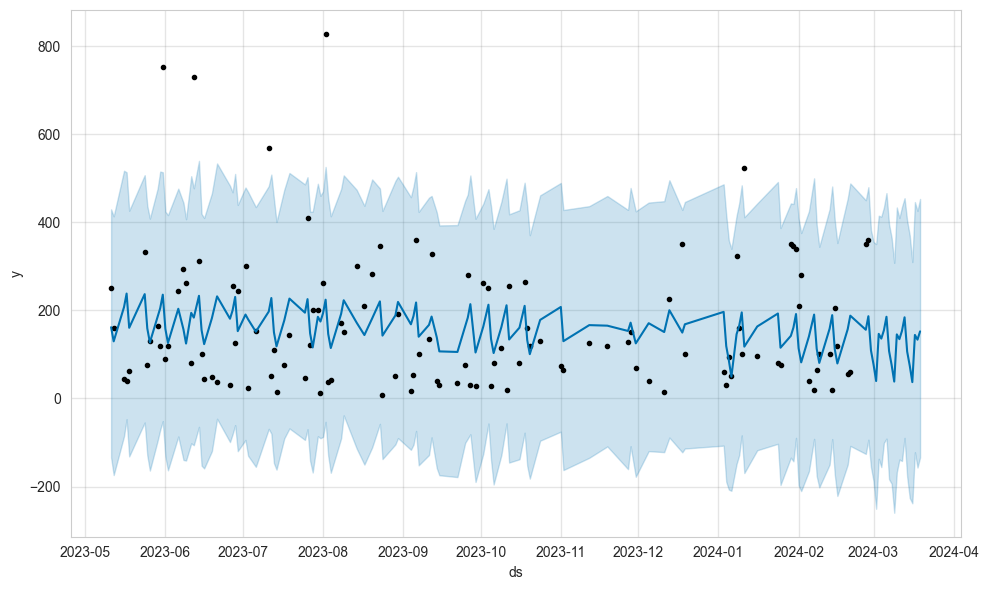

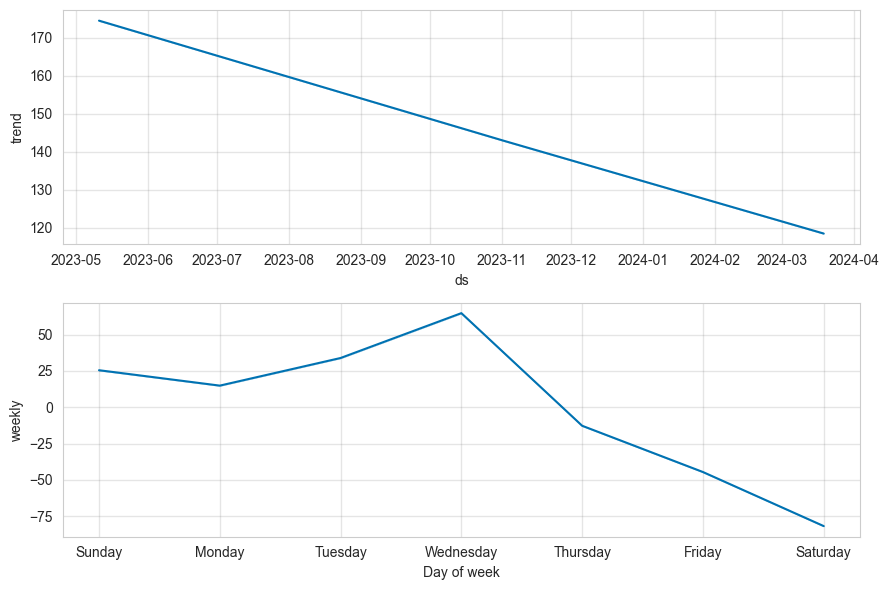

In [29]:
from prophet import Prophet
import pandas as pd

df1=pd.read_csv("../dataset/cleaned.csv")
total_laid_off_count = df1.groupby('Date')['Layoffs'].sum().reset_index()
total_laid_off_count
total_laid_off_count.columns=['ds','y']
total_laid_off_count ['ds']=pd.to_datetime(total_laid_off_count['ds'])
sample_data = total_laid_off_count.tail(120)
sample_data
m=Prophet(interval_width=0.95)
m.fit(sample_data)
future=m.make_future_dataframe(periods=20)
future.tail(20)
forecast = m.predict(future)
forecast.tail(20)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()
Predicted_layoffs_count = m.plot(forecast)
confirmed_forecast_plot1 = m.plot_components(forecast)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'layoffs_data.csv'
df = pd.read_csv('../dataset/layoffs_data.csv')
df.rename(columns={'Laid_Off_Count': 'Layoffs'}, inplace=True)

dfc = pd.read_csv('../dataset/cleaned.csv')

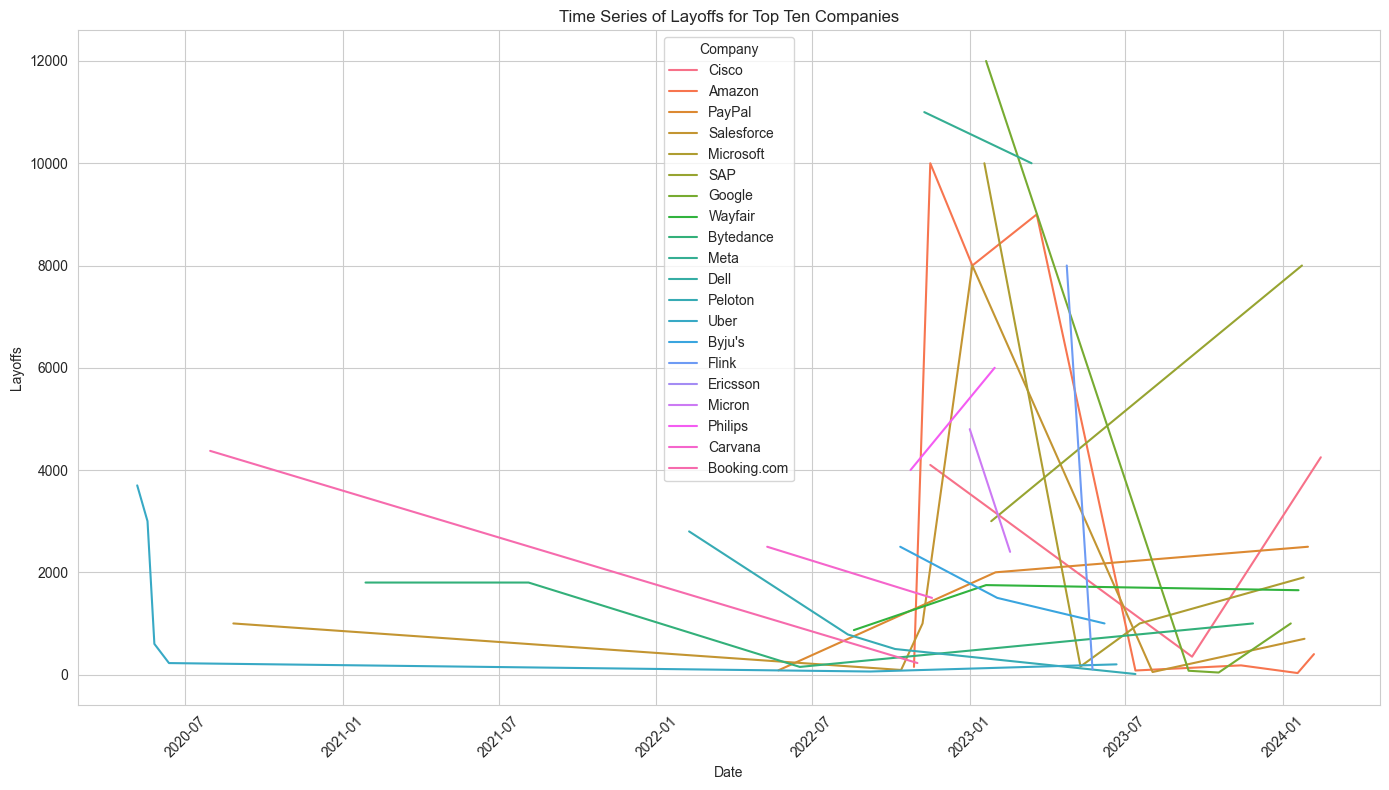

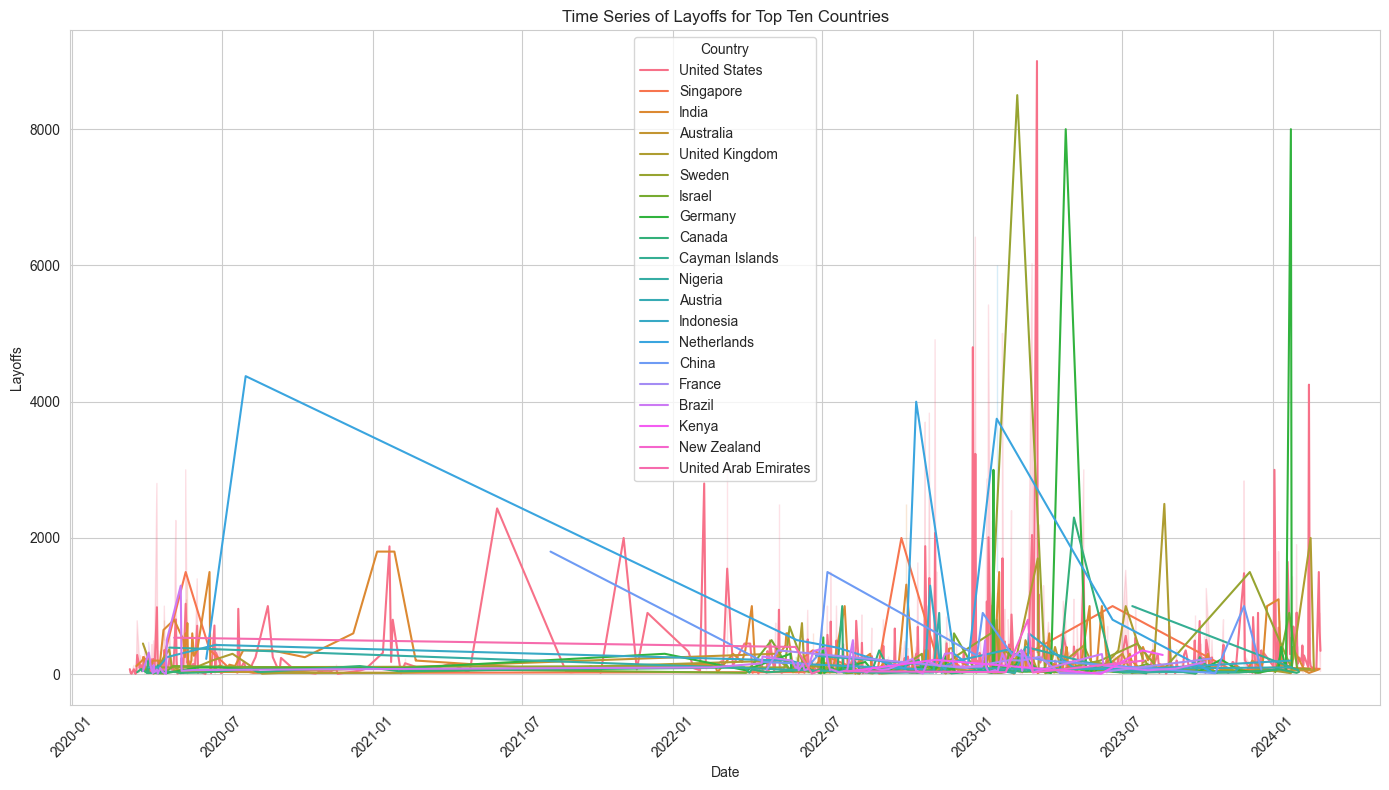

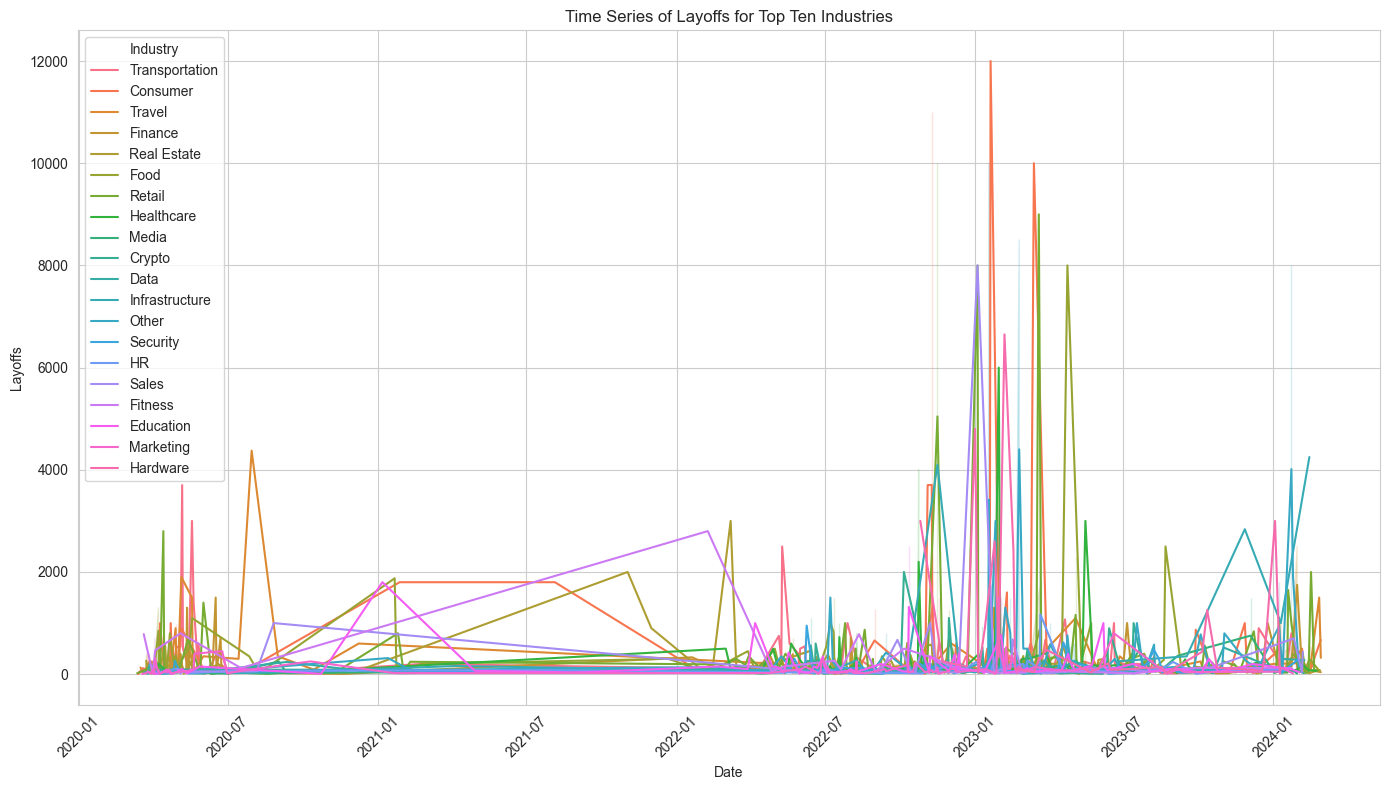

In [3]:
data = df

data['Date'] = pd.to_datetime(data['Date'])

# Calculate total layoffs for each company
total_layoffs = data.groupby('Company')['Layoffs'].sum().reset_index()
# Select the top ten companies based on total layoffs
top_ten_companies = total_layoffs.nlargest(20, 'Layoffs')['Company']
# Filter the data for the top ten companies
top_ten_data = data[data['Company'].isin(top_ten_companies)]
# Visualize time series of layoffs for the top ten companies
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Layoffs', hue='Company', data=top_ten_data)
plt.title('Time Series of Layoffs for Top Ten Companies')
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

total_layoffs_country = data.groupby('Country')['Layoffs'].sum().reset_index()
# Select the top ten countries based on total layoffs
top_ten_countries = total_layoffs_country.nlargest(20, 'Layoffs')['Country']
# Filter the data for the top ten countries
top_ten_data_country = data[data['Country'].isin(top_ten_countries)]
# Visualize time series of layoffs for the top ten countries
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Layoffs', hue='Country', data=top_ten_data_country)
plt.title('Time Series of Layoffs for Top Ten Countries')
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate total layoffs for each industry
total_layoffs_industry = data.groupby('Industry')['Layoffs'].sum().reset_index()
# Select the top ten industries based on total layoffs
top_ten_industries = total_layoffs_industry.nlargest(20, 'Layoffs')['Industry']
# Filter the data for the top ten industries
top_ten_data_industry = data[data['Industry'].isin(top_ten_industries)]
# Visualize time series of layoffs for the top ten industries
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Layoffs', hue='Industry', data=top_ten_data_industry)
plt.title('Time Series of Layoffs for Top Ten Industries')
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

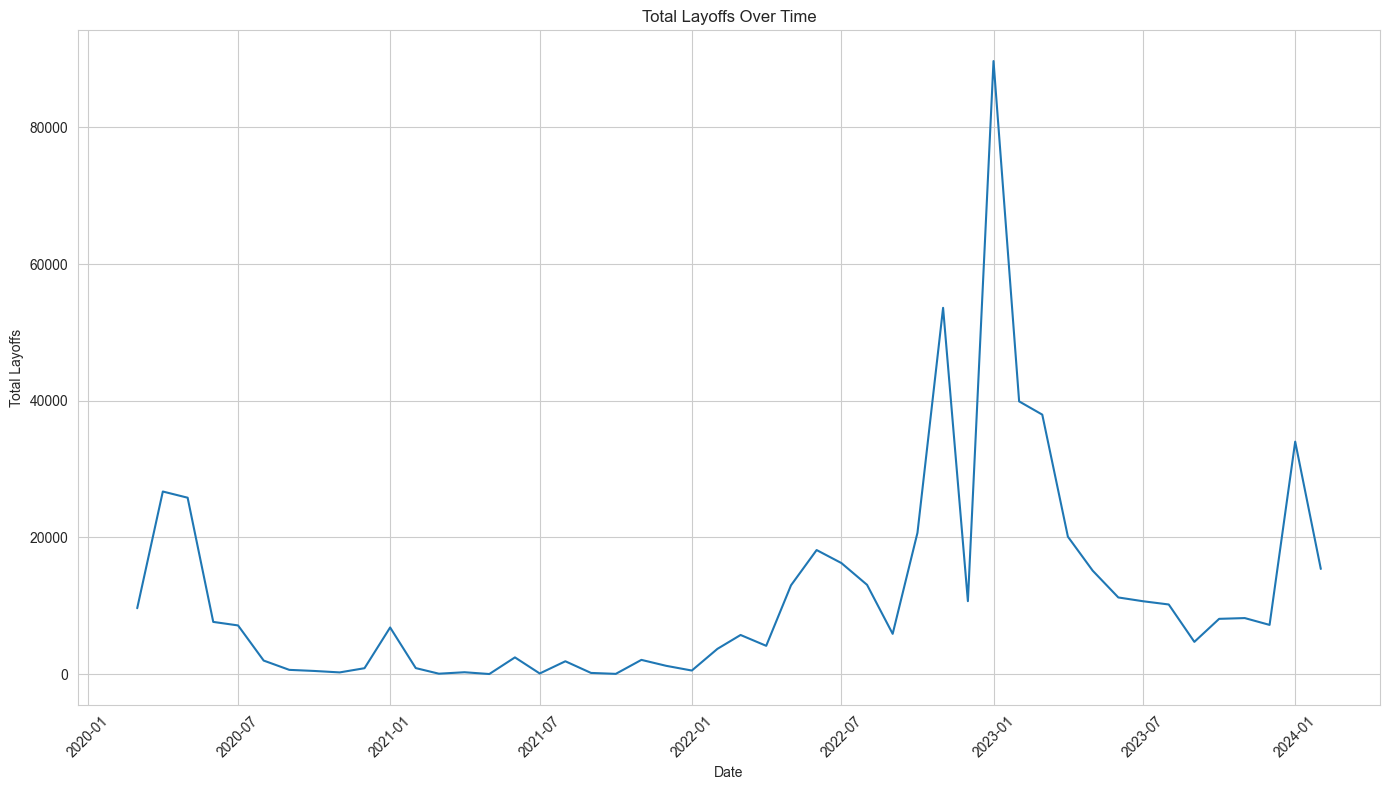

In [4]:
data = df 
data['Date'] = pd.to_datetime(data['Date'])
# Set day component of the date to 01
data['Date'] = data['Date'].dt.to_period('M').dt.to_timestamp()
# Group by date and sum the layoffs
total_layoffs_over_time = data.groupby('Date')['Layoffs'].sum().reset_index()
# Visualize time series of total layoffs over time
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Layoffs', data=total_layoffs_over_time)
plt.title('Total Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

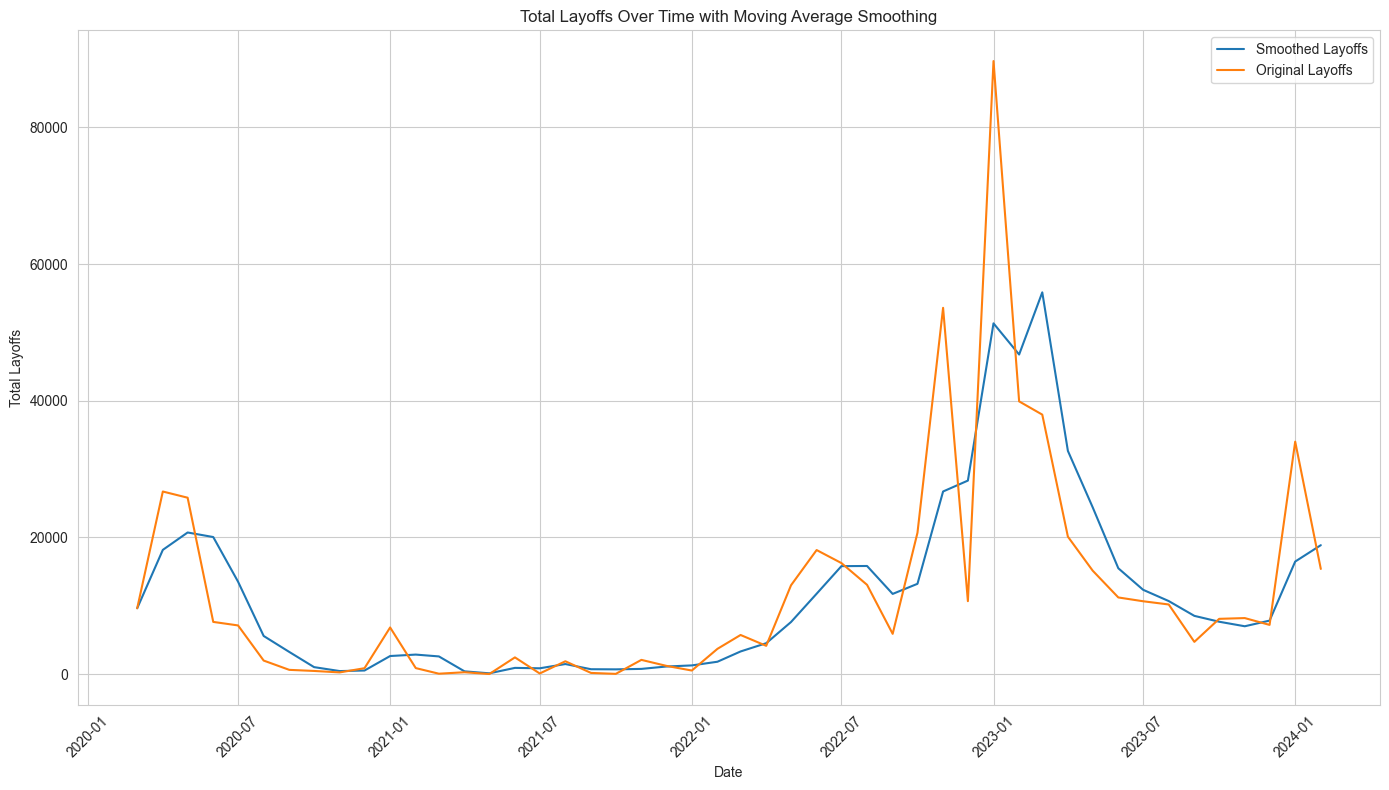

In [5]:
window = 3  # You can adjust the window size as needed
total_layoffs_over_time['Smoothed_Layoffs'] = total_layoffs_over_time['Layoffs'].rolling(window=window, min_periods=1).mean()

# Visualize time series of total layoffs over time with smoothing
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Smoothed_Layoffs', data=total_layoffs_over_time, label='Smoothed Layoffs')
sns.lineplot(x='Date', y='Layoffs', data=total_layoffs_over_time, label='Original Layoffs')
plt.title('Total Layoffs Over Time with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
total_layoffs_over_time.columns

Index(['Date', 'Layoffs', 'Smoothed_Layoffs'], dtype='object')

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 386ms/step - loss: 377083488.0000 - val_loss: 215739712.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 601523584.0000 - val_loss: 215736816.0000
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 383564416.0000 - val_loss: 215733904.0000
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 340301024.0000 - val_loss: 215730896.0000
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 349721952.0000 - val_loss: 215727680.0000
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 363461792.0000 - val_loss: 215724144.0000
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 395481824.0000 - val_loss: 215720048.0000
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 482860032.0000 - val_loss: 215714048.0000
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 355111424.0000 - val_loss: 215708608.0000
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 377714592.0000 - val_loss: 215702656.000

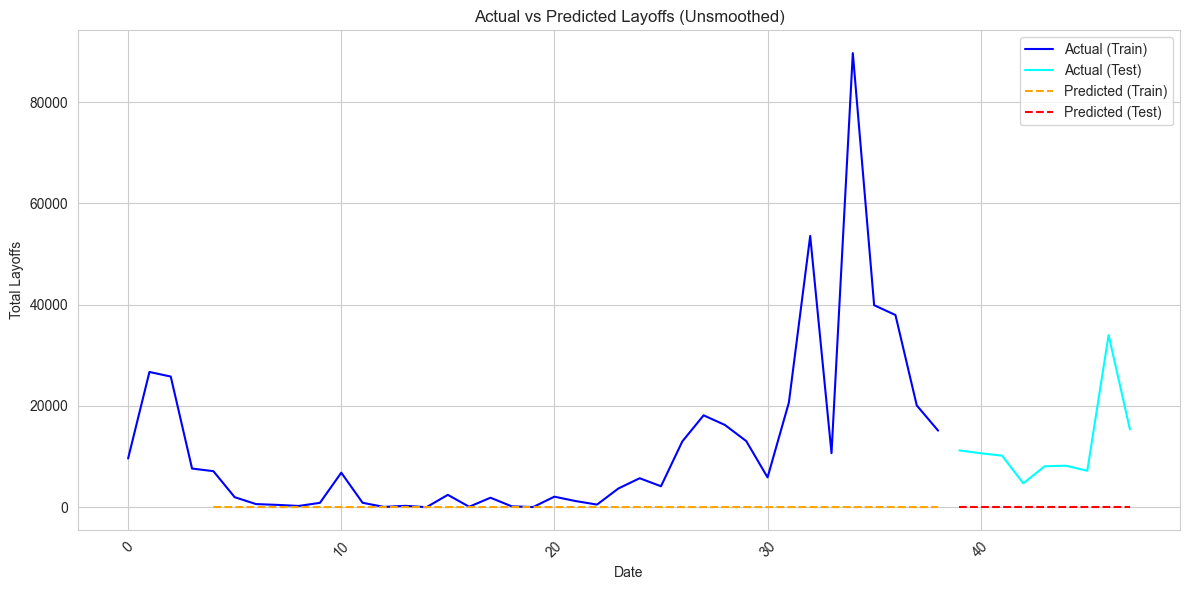

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Define window size for sequence data
window_size = 4  # You can adjust the window size as needed

# Function to prepare data for LSTM
def prepare_data(sequence_data, window_size):
    X, y = [], []
    for i in range(len(sequence_data) - window_size):
        X.append(sequence_data[i:i+window_size])
        y.append(sequence_data[i+window_size])
    return np.array(X), np.array(y)

# Prepare data for LSTM
X_unsmoothed, y_unsmoothed = prepare_data(total_layoffs_over_time['Layoffs'].values, window_size)

# Split data into train and test sets
train_size = int(len(X_unsmoothed) * 0.8)
test_size = len(X_unsmoothed) - train_size
X_train_unsmoothed, X_test_unsmoothed = X_unsmoothed[:train_size], X_unsmoothed[train_size:]
y_train_unsmoothed, y_test_unsmoothed = y_unsmoothed[:train_size], y_unsmoothed[train_size:]

# Reshape data for LSTM input (samples, time steps, features)
X_train_unsmoothed = np.reshape(X_train_unsmoothed, (X_train_unsmoothed.shape[0], window_size, 1))
X_test_unsmoothed = np.reshape(X_test_unsmoothed, (X_test_unsmoothed.shape[0], window_size, 1))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_unsmoothed.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_unsmoothed, y_train_unsmoothed, epochs=100, batch_size=32, validation_data=(X_test_unsmoothed, y_test_unsmoothed), verbose=1)

# Make predictions
train_predictions_unsmoothed = model.predict(X_train_unsmoothed)
test_predictions_unsmoothed = model.predict(X_test_unsmoothed)

print(test_predictions_unsmoothed)

# Plot actual vs predicted values for unsmoothed dataset
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(total_layoffs_over_time.index[:-test_size], total_layoffs_over_time['Layoffs'][:-test_size], label='Actual (Train)', color='blue')
plt.plot(total_layoffs_over_time.index[-test_size:], total_layoffs_over_time['Layoffs'][-test_size:], label='Actual (Test)', color='cyan')

# Plot predicted values
train_indices = total_layoffs_over_time.index[window_size:window_size+train_size]
test_indices = total_layoffs_over_time.index[window_size+train_size:window_size+train_size+test_size+1]
plt.plot(train_indices, train_predictions_unsmoothed, label='Predicted (Train)', color='orange', linestyle='--')
plt.plot(test_indices, test_predictions_unsmoothed, label='Predicted (Test)', color='red', linestyle='--')

# Add legend and labels
plt.title('Actual vs Predicted Layoffs (Unsmoothed)')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
